In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
data = pd.read_csv('diabetes2.csv')

In [62]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


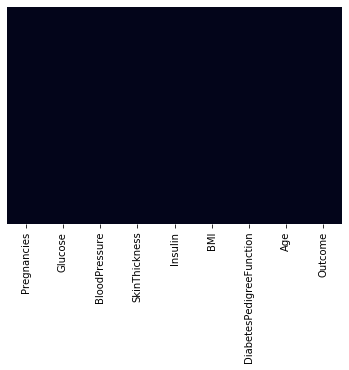

In [63]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

NO MISSING VALUES


In [64]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']

In [65]:
#dividing training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=55)

In [66]:
def sigmoid(z):
    hyp = 1 / (1 + np.exp(-z))
    return hyp

In [67]:
X_train.shape[0]

614

In [177]:
size=X_train.shape[0]
b1=0
W1=np.zeros(X_train.shape[1])
lr=0.00027 #learning rate
itr=20000  #iterations
epoch=500
cost_list = []
epoch_list=[]

In [178]:
def MODEL(X_train,y_train,lr,itr):
    W=W1 #initial value of weight
    b=b1 #initial bias
    
    for i in range(itr): 
        sigma = sigmoid(np.dot(X_train, W) + b)
        cost_fn = -1/size * (np.sum(y_train * np.log(sigma) + (1 - y_train) * np.log(1-sigma)))
        dW = 1/size * np.dot(X_train.T, (sigma - y_train))
        db = 1/size * np.sum(sigma - y_train)
        W = W - lr*dW
        b = b - lr*db 
        if i%epoch ==0:
            cost_list.append(cost_fn)
            epoch_list.append(i)
            print ("Cost function after iteration %i: %f" %(i, cost_fn))
            
    return W,b

In [179]:
weight,bias=MODEL(X_train,y_train,lr,itr)

Cost function after iteration 0: 0.693147
Cost function after iteration 500: 0.626133
Cost function after iteration 1000: 0.623235
Cost function after iteration 1500: 0.621123
Cost function after iteration 2000: 0.619426
Cost function after iteration 2500: 0.618029
Cost function after iteration 3000: 0.616867
Cost function after iteration 3500: 0.615892
Cost function after iteration 4000: 0.615067
Cost function after iteration 4500: 0.614361
Cost function after iteration 5000: 0.613752
Cost function after iteration 5500: 0.613220
Cost function after iteration 6000: 0.612751
Cost function after iteration 6500: 0.612333
Cost function after iteration 7000: 0.611955
Cost function after iteration 7500: 0.611611
Cost function after iteration 8000: 0.611294
Cost function after iteration 8500: 0.611000
Cost function after iteration 9000: 0.610723
Cost function after iteration 9500: 0.610461
Cost function after iteration 10000: 0.610211
Cost function after iteration 10500: 0.609970
Cost functio

Text(0, 0.5, 'Cost Function')

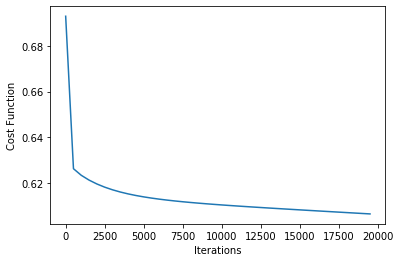

In [180]:
plt.plot(epoch_list,cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost Function')

In [181]:
bias

-0.2051165073261634

In [182]:
weight

array([ 0.11319084,  0.01504176, -0.02703736,  0.00540425,  0.00143647,
       -0.01087756,  0.04218926, -0.01336911])

In [183]:
sigmoid(np.dot(X_test,weight)+bias) >= 1/2

array([False, False, False, False,  True, False, False, False, False,
       False,  True, False,  True,  True,  True, False, False, False,
        True,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True,  True, False,
       False,  True,  True, False,  True, False, False, False,  True,
       False, False, False,  True, False,  True,  True,  True,  True,
       False, False,  True, False, False, False, False, False, False,
        True, False,  True,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False,  True,  True, False, False,
       False, False,  True, False, False,  True, False,  True, False,
       False, False,  True, False, False,  True, False, False,  True,
       False,  True, False,  True, False,  True,  True, False, False,
       False,  True,  True,  True,  True, False, False, False, False,
       False, False,

In [184]:
y_test.values

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1],
      dtype=int64)

In [185]:
def prediction(w,b,x):
    y=sigmoid(np.dot(x,weight) + bias)
    pred=np.zeros((x.shape[0]))
    for i in range(x.shape[0]):
        value=y[i]
        if value >= 0.5:
            pred[i]=1
        else:
            pred[i]=0
    return pred

In [186]:
prediction(weight ,bias,X_train)

array([0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0.

In [187]:
#accuracy
y_pred = prediction(weight, bias, X_test)
accuracy =  (1-(np.sum(abs(y_test - y_pred))/X_test.shape[0]))*100
print(accuracy)

70.7792207792208
